In [29]:
import pandas as pd


######################
###     Minbzk     ###
######################
# RESULTS_FILE_1 = "evaluation_minbzk_no_requests_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_BM25S.csv"



# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_bert-base-dutch-cased.csv"



# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_all-MiniLM-L6-v2.csv"


def extract_text(input_string):
    import re
    # Use regex to find text after 'min' and before the first '_'
    match = re.search(r'min([^_]+)_', input_string)
    if match:
        return match.group(1)
    else:
        return None


EVALUATION_FOLDER = "final_evaluation_minbzk" if "minbzk" in RESULTS_FILE_1 else "final_evaluation"
woo_data_1 = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE_1}")
woo_data_2 = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE_2}")
woo_data_3 = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE_3}")
woo_data_4 = pd.read_csv(f"./final_extra_evaluation_results/{RESULTS_FILE_4}")
woo_data_5 = pd.read_csv(f"./final_extra_evaluation_results/{RESULTS_FILE_5}")
DOCS_FOLDER = "final_docs_minbzk" if "minbzk" in RESULTS_FILE_1 else "final_docs"
base_data = pd.read_csv(f"./{DOCS_FOLDER}/min{extract_text(RESULTS_FILE_1)}_no_requests/woo_merged.csv.gz")

# See how many pages correspond to the dossier
dossier_count = base_data['dossier_id'].value_counts().to_dict()
dossier_dict = base_data.groupby('dossier_id')['document_id'].apply(lambda x: list(set(x))).to_dict()
print(base_data['document_id'].nunique())

410


In [30]:
def calculate_metrics(woo_data, n):
    ap=[]
    precision=[]
    recall=[]
    f1=[]
    resultsTrue = 0
    resultsFalse = 0
    resultsTrueDocument = 0
    resultsFalseDocument = 0

    for index, row in woo_data.iterrows():
        results = []
        # Get all the data in a list
        for i in range(1, n + 1):
            dossier_col_name = f'dossier#{i}'
            if dossier_col_name in row:
                results.append(row[dossier_col_name])

        # # Check results
        # resultsTrue += results.count(True)
        # resultsFalse += results.count(False)

        # correct_documents = dossier_dict[row['dossier_id']]

        # tempResultsTrueDocument = set()
        # tempResultsFalseDocument = set()
        # for i in row['retrieved_document_ids'].split(", ")[:n]:
        #     if i in correct_documents:
        #         tempResultsTrueDocument.add(i)
        #     else:
        #         tempResultsFalseDocument.add(i)
        # resultsTrueDocument += len(tempResultsTrueDocument)
        # resultsFalseDocument += len(tempResultsFalseDocument)

        # Calculate Precision
        precision_score = results.count(True) / len(results)
        precision.append(precision_score)

        # Calculate Recall
        total_pages_nr = dossier_count.get(row['dossier_id'], 0)
        # recall_score = results.count(True) / len(results)
        recall_score = results.count(True) / total_pages_nr
        recall.append(recall_score)

        # Calculate f1
        if precision_score + recall_score > 0:
            f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
        else:
            f1_score = 0
        f1.append(f1_score)

        # Calculate MAP1
        average_precision = 0
        for k, result in enumerate(results, 1):
            if not result:
                continue
            average_precision += results[:k].count(True) / k
        
        # average_precision /= total_pages_nr
        average_precision /= len(results)
        ap.append(average_precision)

    # print(f"for n = {n}")
    # print(f"True results: {resultsTrue}")
    # print(f"False results: {resultsFalse}")
    # print(f"True results document: {resultsTrueDocument}")
    # print(f"False results document: {resultsFalseDocument}")
    return sum(ap) / len(ap), sum(precision) / len(precision), sum(recall) / len(recall), sum(f1) / len(f1)

In [31]:
results = {
    "Metric": ["BM25 (db: raw, query: raw)", "BERTje (db: paraphrase, query: raw)", "MiniLM (db: raw, query: raw)", "allnli", "Multilingual MiniLM"]
}

for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    map_score1, _, _, _ = calculate_metrics(woo_data_1, i)
    map_score2, _, _, _ = calculate_metrics(woo_data_2, i)
    map_score3, _, _, _ = calculate_metrics(woo_data_3, i)
    map_score4, _, _, _ = calculate_metrics(woo_data_4, i)
    map_score5, _, _, _ = calculate_metrics(woo_data_5, i)
    results[i] = [map_score1, map_score2, map_score3, map_score4, map_score5]

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set the 'Metric' column as the index
results_df.set_index("Metric", inplace=True)

pd.set_option('display.max_colwidth', None)
# Display the DataFrame
results_df

,10,20,30,40,50,60,70,80,90,100
Metric,,,,,,,,,,
"BM25 (db: raw, query: raw)",0.726762,0.659943,0.607567,0.571225,0.537779,0.512099,0.489553,0.469793,0.452520,0.436130
"BERTje (db: paraphrase, query: raw)",0.051316,0.039632,0.032777,0.029449,0.026534,0.024220,0.022294,0.020881,0.020409,0.021572
"MiniLM (db: raw, query: raw)",0.074266,0.053157,0.042675,0.036603,0.032915,0.029886,0.027418,0.025612,0.024355,0.024190
allnli,0.043301,0.031543,0.024794,0.021452,0.018929,0.017269,0.015767,0.014567,0.013788,0.013425
Multilingual MiniLM,0.055519,0.039220,0.032174,0.028341,0.025405,0.023091,0.021115,0.019858,0.018776,0.018403


C:\Users\Nicky\AppData\Local\Temp\ipykernel_11440\2865243547.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(results_df.index))  # Colormap


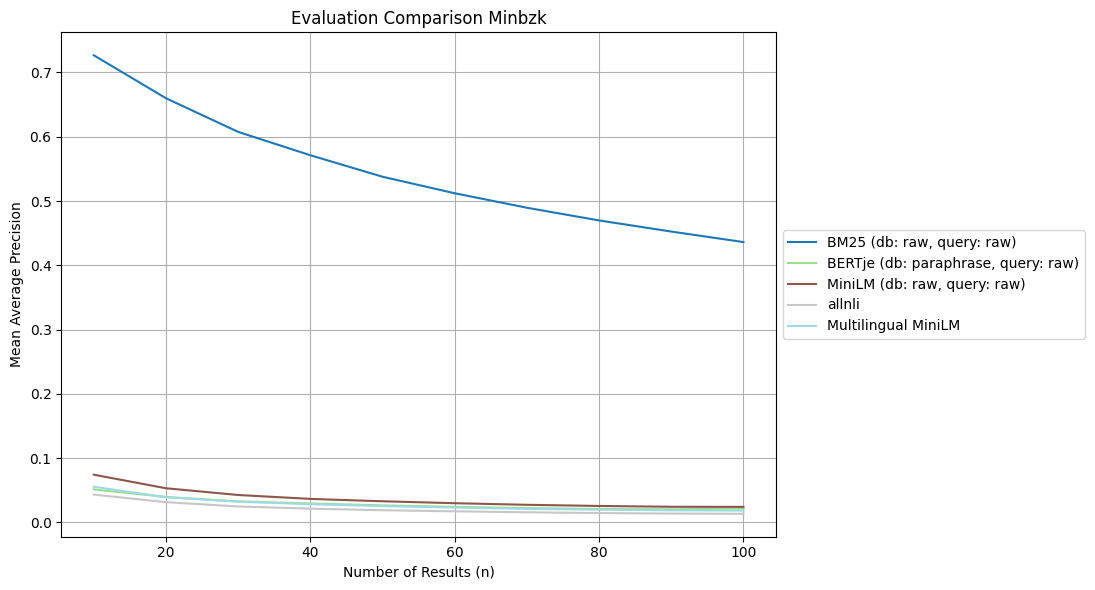

In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create 4 subplots for each metric
# metrics = ["MAP ", "Precision (db: paraphrase, query:raw)", "Recall (db: raw, query: raw)"]

# Index for metrics
index = ["BM25 (db: raw, query: raw)", "BERTje (db: paraphrase, query: raw)", "MiniLM (db: raw, query: raw)", "allnli", "Multilingual MiniLM"]

# Create DataFrame
results_df = pd.DataFrame(results_df, index=index)

# Plot settings
cmap = cm.get_cmap('tab20', len(results_df.index))  # Colormap
metrics = results_df.index

plt.figure(figsize=(13, 6))  # Set figure size

# Iterate over each metric to plot
for i, metric in enumerate(metrics):
    plt.plot(results_df.columns, results_df.loc[metric], label=metric, color=cmap(i))

# Titles and labels
plt.title("Evaluation Comparison Minbzk")
plt.xlabel("Number of Results (n)")
plt.ylabel("Mean Average Precision")

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Grid and layout adjustments
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

In [ ]:
import pandas as pd


######################
###     Minbzk     ###
######################
RESULTS_FILE_1 = "evaluation_minbzk_no_requests_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_BM25S.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_BM25S.csv"



# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_bert-base-dutch-cased.csv"

RESULTS_FILE_2 = "evaluation_minbzk_no_requests_minbzk_paraphrase_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_bert-base-dutch-cased.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_bert-base-dutch-cased.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_bert-base-dutch-cased.csv"



RESULTS_FILE_3 = "evaluation_minbzk_no_requests_minbzk_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_keywords_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_paraphrase_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_paraphrase_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_paraphrase_all-MiniLM-L6-v2.csv"

# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_real_words_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_stem_stopwords_minbzk_real_words_all-MiniLM-L6-v2.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_real_words_all-MiniLM-L6-v2.csv"

RESULTS_FILE_4 = "evaluation_minbzk_no_requests_minbzk_allnli-GroNLP-bert-base-dutch-cased.csv"
RESULTS_FILE_5 = "evaluation_minbzk_no_requests_minbzk_paraphrase-multilingual-MiniLM-L12-v2.csv"

def extract_text(input_string):
    import re
    # Use regex to find text after 'min' and before the first '_'
    match = re.search(r'min([^_]+)_', input_string)
    if match:
        return match.group(1)
    else:
        return None


EVALUATION_FOLDER = "final_evaluation_minbzk" if "minbzk" in RESULTS_FILE_1 else "final_evaluation"
woo_data_1 = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE_1}")
woo_data_2 = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE_2}")
woo_data_3 = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE_3}")
woo_data_4 = pd.read_csv(f"./final_extra_evaluation_results/{RESULTS_FILE_4}")
woo_data_5 = pd.read_csv(f"./final_extra_evaluation_results/{RESULTS_FILE_5}")
DOCS_FOLDER = "final_docs_minbzk" if "minbzk" in RESULTS_FILE_1 else "final_docs"
base_data = pd.read_csv(f"./{DOCS_FOLDER}/min{extract_text(RESULTS_FILE_1)}_no_requests/woo_merged.csv.gz")

# See how many pages correspond to the dossier
dossier_count = base_data['dossier_id'].value_counts().to_dict()
dossier_dict = base_data.groupby('dossier_id')['document_id'].apply(lambda x: list(set(x))).to_dict()
print(base_data['document_id'].nunique())